<a href="https://colab.research.google.com/github/JinseongP/Basic-AI/blob/main/ML/2_3_pca_Iris_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## https://ichi.pro/ko/kaggle-iris-deiteo-seteuleul-sayonghan-eda-mich-ml-bunseog-128545847583368 참고

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
iris=load_iris()
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target']=iris.target

In [2]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
## dataframe shape 확인
df.shape

(150, 5)

In [4]:
## column별 data type 확인
for column in df.columns:
    print('{}=>{}'.format(column,df[column].dtype))

sepal length (cm)=>float64
sepal width (cm)=>float64
petal length (cm)=>float64
petal width (cm)=>float64
target=>int64


In [5]:
df['target']=df['target'].astype(str)

In [6]:
## column별 data type 확인
for column in df.columns:
    print('{}=>{}'.format(column,df[column].dtype))

sepal length (cm)=>float64
sepal width (cm)=>float64
petal length (cm)=>float64
petal width (cm)=>float64
target=>object


In [7]:
## 결측치 개수 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
## 기본적인 통계량 확인
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


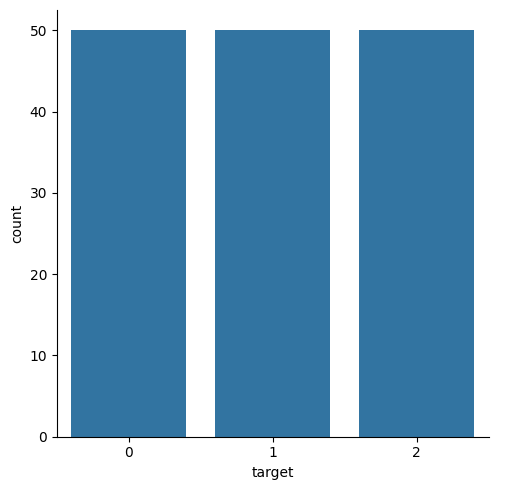

In [9]:
import seaborn as sns
## catplot: categorical plot을 활용하여 target class에 대한 분포를 확인
sns.catplot(x='target',data=df,kind='count')

<Axes: xlabel='sepal width (cm)', ylabel='Density'>

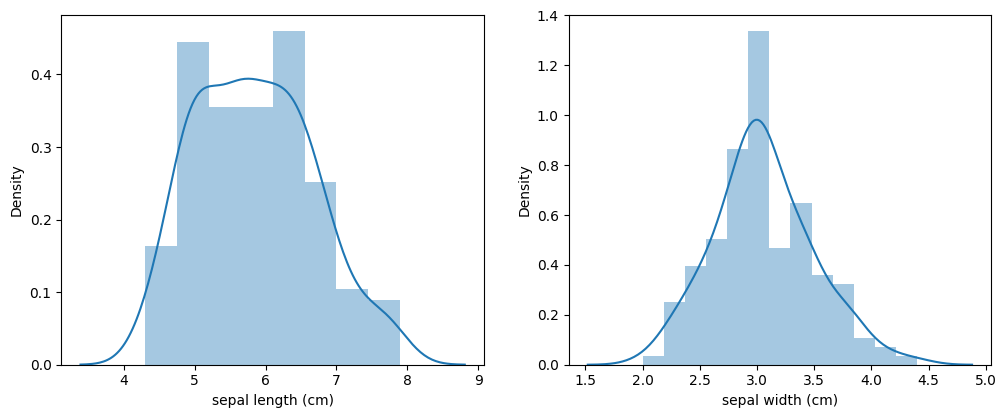

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.distplot(df['sepal length (cm)'])
plt.subplot(2,2,2)
sns.distplot(df['sepal width (cm)'])

In [11]:
## feature별 skewness, kurtosis 알아보기
for column in df.columns:
    if column != 'target':
        print('{} skew: {}'.format(column,df[column].skew()))
        print('{} kurtosis: {}'.format(column,df[column].kurtosis()))


sepal length (cm) skew: 0.3149109566369728
sepal length (cm) kurtosis: -0.5520640413156395
sepal width (cm) skew: 0.31896566471359966
sepal width (cm) kurtosis: 0.2282490424681929
petal length (cm) skew: -0.27488417975101276
petal length (cm) kurtosis: -1.4021034155217518
petal width (cm) skew: -0.10296674764898116
petal width (cm) kurtosis: -1.340603996612646


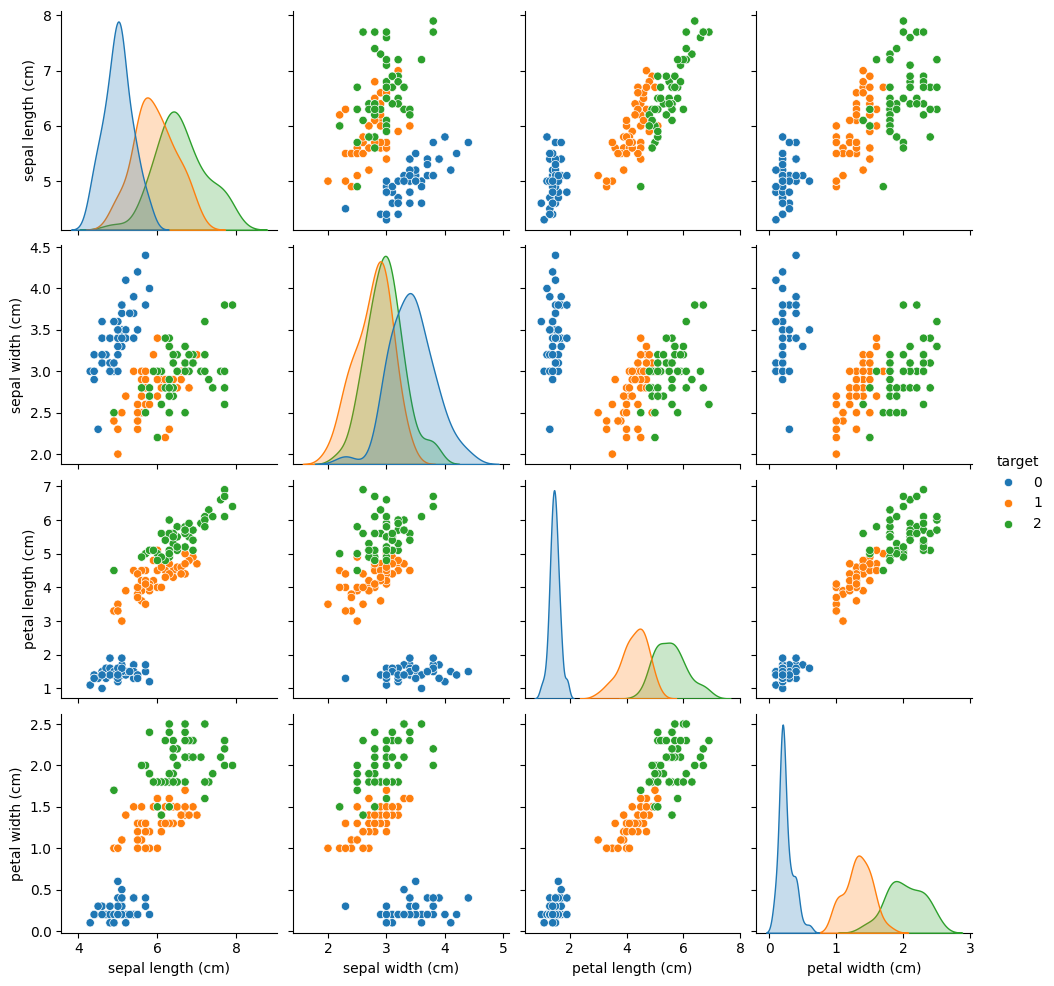

In [12]:
### sns.pairplot을 활용하여 feature간 관계 확인
sns.pairplot(df, hue='target',vars=['sepal length (cm)','sepal width (cm)', 'petal length (cm)','petal width (cm)'])

<Axes: >

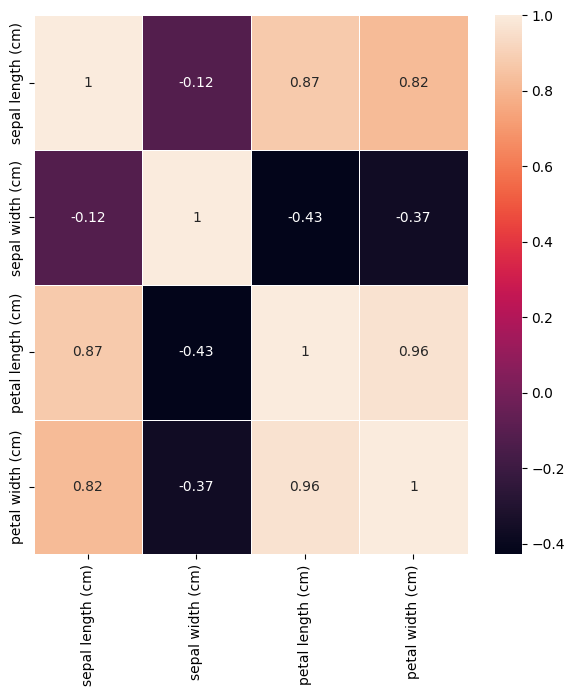

In [13]:
## heatmap을 통해 상관계수 확인
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5)

<Axes: xlabel='target', ylabel='petal width (cm)'>

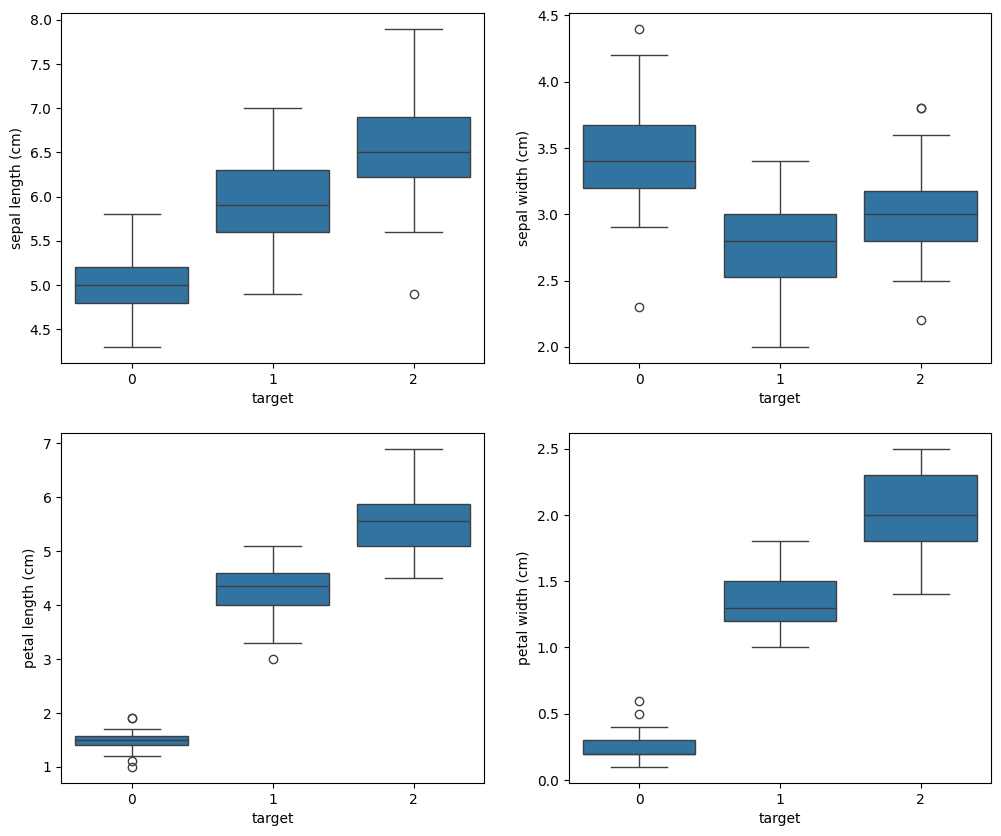

In [14]:
## boxplot을 활용한 분석
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='target',y='sepal length (cm)',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='target',y='sepal width (cm)',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='target',y='petal length (cm)',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='target',y='petal width (cm)',data=df)

<Axes: xlabel='target', ylabel='petal width (cm)'>

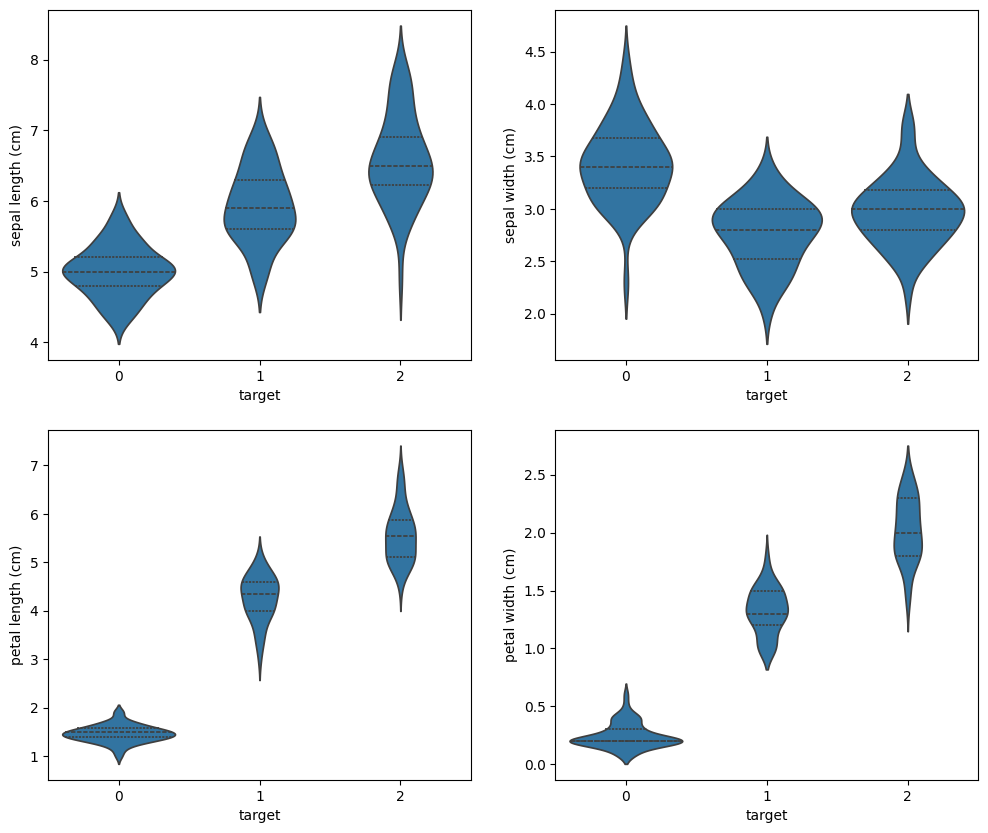

In [15]:
## violin plot을 활용한 분석
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='target',y='sepal length (cm)',data=df, inner='quartile')
plt.subplot(2,2,2)
sns.violinplot(x='target',y='sepal width (cm)',data=df, inner='quartile')
plt.subplot(2,2,3)
sns.violinplot(x='target',y='petal length (cm)',data=df, inner='quartile')
plt.subplot(2,2,4)
sns.violinplot(x='target',y='petal width (cm)',data=df, inner='quartile')

In [16]:
## PCA 와 Logistic Regression
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 0:4].values, df.iloc[:, 4].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
                     stratify=y,
                     random_state=0) #7:3으로 분할

In [17]:
## 데이터 정규화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [18]:
## pca!
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std) #정규화된 데이터를 사용
# X_test_pca = pca.fit(X_train_std).transform(X_test_pca)
pca.explained_variance_ratio_

array([0.72454601, 0.23642515, 0.03422874, 0.0048001 ])

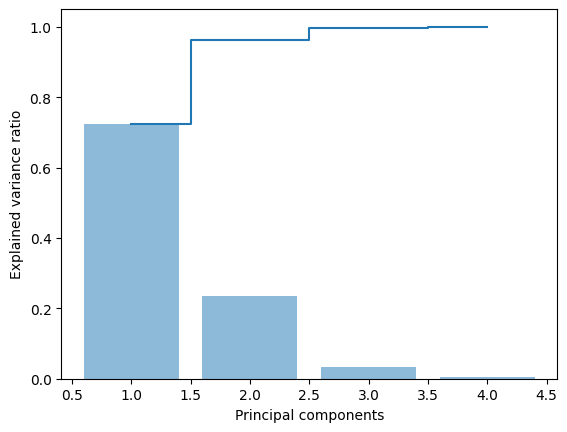

In [19]:
plt.bar(range(1, 5), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 5), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [20]:
## 2개의 component만 사용!
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [21]:
## X_train이 2차원 벡터로 변환되었음을 알 수 있다.
X_train_pca

array([[ 1.96578183e+00,  9.87171937e-01],
       [ 2.39896809e+00,  2.44292262e+00],
       [ 1.55937101e+00,  6.35377678e-01],
       [-2.72229777e+00,  4.97156913e-01],
       [-2.11517326e+00,  3.59038471e-01],
       [-2.41357690e+00, -8.12695023e-01],
       [-5.29631591e-01, -1.75219948e+00],
       [ 1.53901706e+00, -4.06726628e-01],
       [ 5.89291429e-01,  3.79409895e-02],
       [ 1.83042414e+00,  3.95584715e-01],
       [-2.06243924e+00, -6.28736732e-01],
       [ 7.26189105e-01,  7.50613527e-01],
       [-4.85905060e-01, -1.45659120e+00],
       [ 8.75478532e-01,  5.02740860e-02],
       [-2.07596552e+00, -5.89935186e-01],
       [-2.20479980e+00,  2.71182571e-01],
       [ 2.72349918e+00,  8.11440784e-01],
       [ 1.11237773e-01, -1.22669974e+00],
       [ 7.33397778e-02, -1.47592803e+00],
       [ 1.17720285e+00, -1.62900000e+00],
       [ 2.27459124e+00,  2.51785136e+00],
       [ 1.96406897e-01, -3.52654816e-01],
       [-2.34839609e+00,  6.78217431e-01],
       [-1.

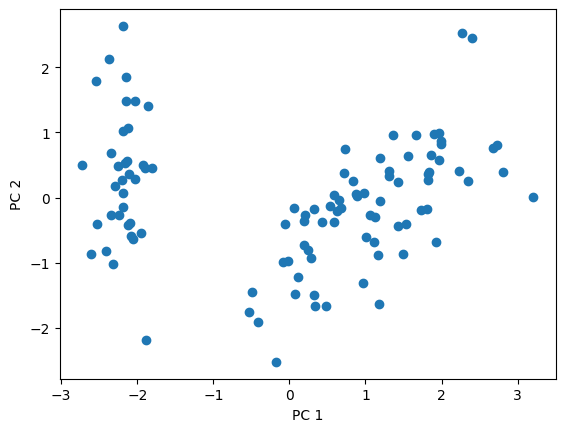

In [22]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [23]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    X = X.astype(float)
    y = y.astype(float)
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 #x의 범위를 통해 plot의 범위 설정
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape).astype(float)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

In [24]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

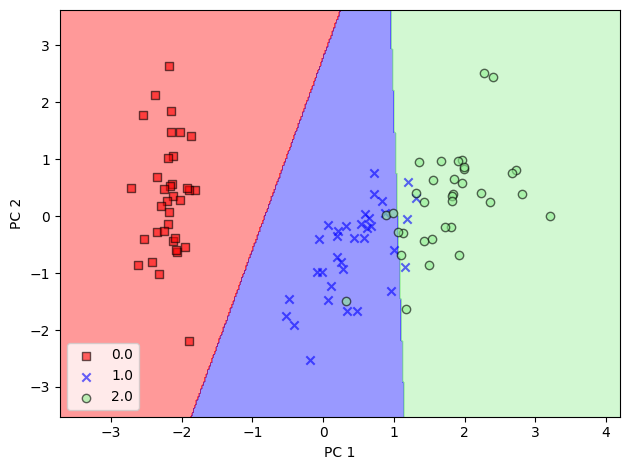

In [25]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

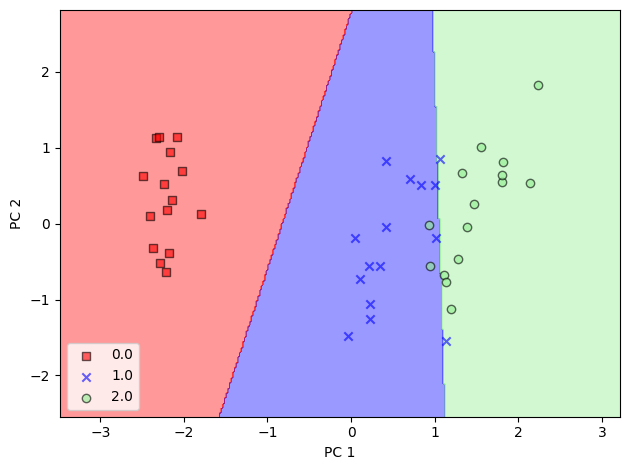

In [26]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()